# Import Libraries

In [21]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage

# Load Dataset

In [13]:
df_segmentation = pd.read_csv('Mall_Customers.csv', index_col = 0)

#Change the values in the Gender column into binary values
df_segmentation.Gender[df_segmentation.Gender == 'Male'] = 1
df_segmentation.Gender[df_segmentation.Gender == 'Female'] = 0

/var/folders/w7/kzghqm315y9f7r50lrmmzqqw0000gn/T/ipykernel_2936/2673849794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segmentation.Gender[df_segmentation.Gender == 'Male'] = 1
/var/folders/w7/kzghqm315y9f7r50lrmmzqqw0000gn/T/ipykernel_2936/2673849794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segmentation.Gender[df_segmentation.Gender == 'Female'] = 0


# Explore Data

In [14]:
df_segmentation.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [26]:
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


This dataset only has 200 observations. 

And because we have no prior knowledge about the number of clusters that might exist in this datset, we will start by performing hierarchical clustering to determine that. This is an undirected data mining technique that finds patterns in the data without regard to any target variable. This is useful to see if the customers in this dataset naturally fall into different groups. 

Then we can employ flat clustering (which is much faster, especially when we have a large dataset) for the segmentation itself.

In [15]:
df_segmentation.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Here we can see that the average age of the mall visitors is around 39, which is not too far from the median age which is 36. It seems like this mall attracts mostly the middle-aged group. 

The average income of the mall customers is about $60k and their average spending score is around 50. The mall would want to look into ways to increase customer spending. 

There are some extreme value outliers in terms of annual income and spending score. More specifically, the maximum spending score is 99, which is very high. The mall will want to focus on the most profitable group of customers and offers them the best service to keep their loyalty. 

In [16]:
df_segmentation.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


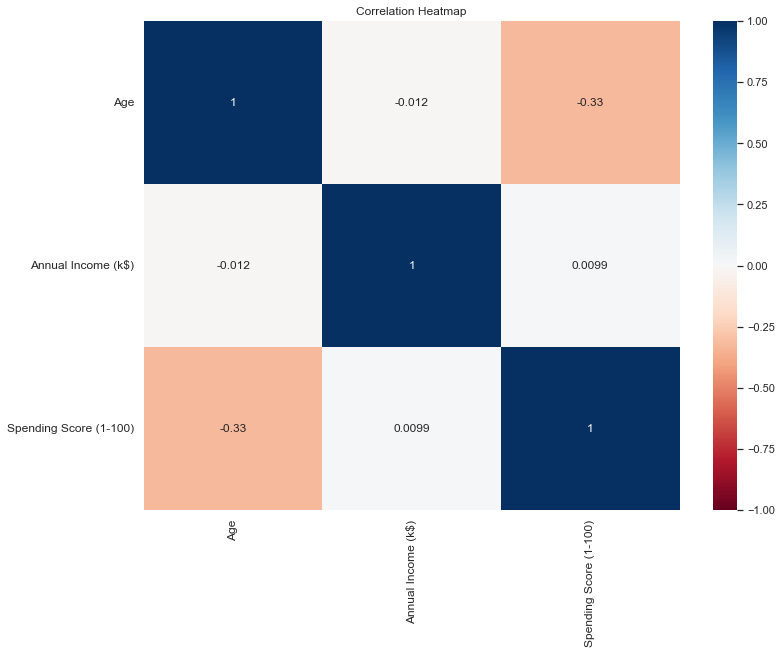

In [17]:
plt.figure(figsize = (12,9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Visualization of raw data')

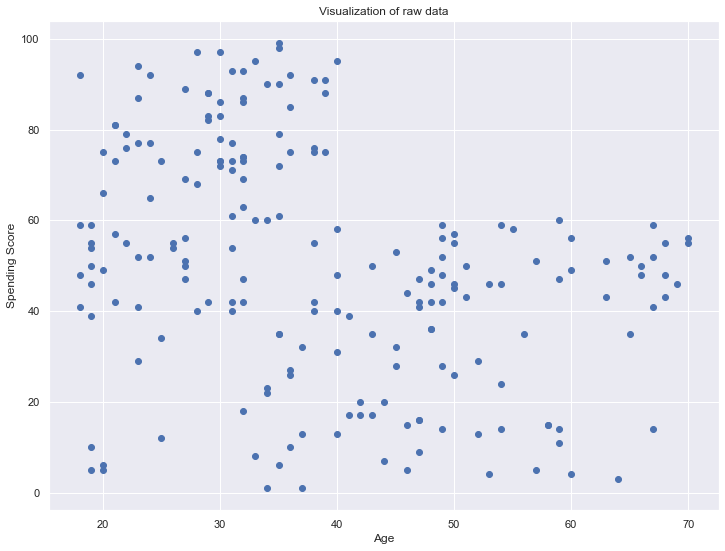

In [18]:
plt.figure(figsize = (12,9))
plt.scatter(df_segmentation.iloc[:, 1], df_segmentation.iloc[:, 3])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Visualization of raw data')

Interestingly, there doesn't seem to be any meaningful relationship between age and annual income. However, age appears to have a modest impact on spending score where as age increases, spending score also increases. 

# Standardization

In [22]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

# Hierarchical Clustering

In [23]:
hier_clust = linkage(segmentation_std, method = 'ward')

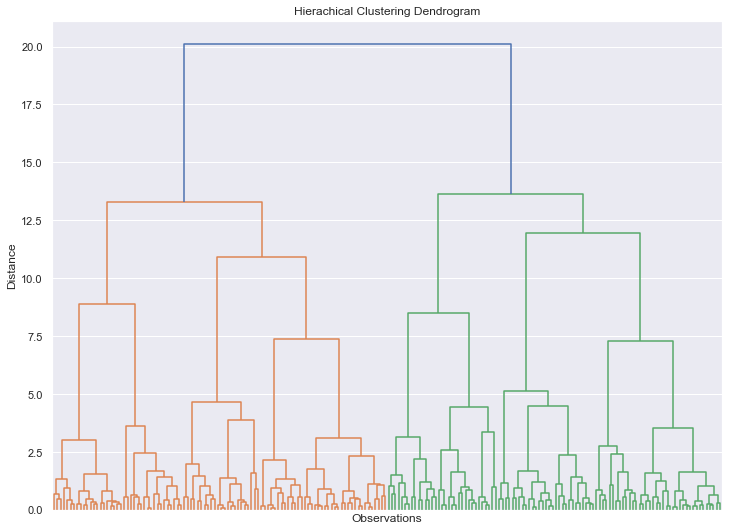

In [25]:
plt.figure(figsize = (12,9))
plt.title('Hierachical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust, 
          show_leaf_counts = False,
          no_labels = True)
plt.show()

We have 2 clusters in this dataset. This indicates that there might be 2 customer segments that can be identified from the dataset. 